<a href="https://colab.research.google.com/github/vsjamwal/Algo-trading-Strategies-/blob/main/Volatility_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


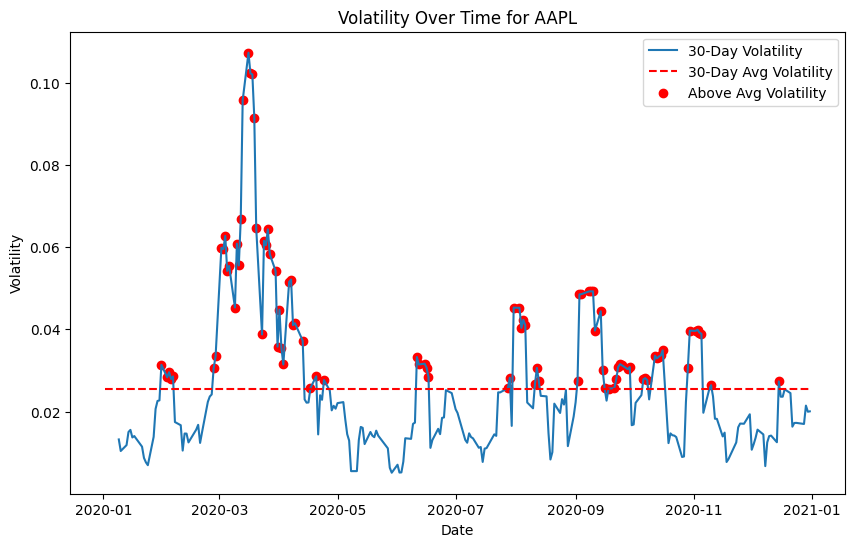

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate volatility
def calculate_volatility(ticker, start_date, end_date):
    # Download historical data
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate daily percentage change
    stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

    # Calculate volatility as the standard deviation of daily percentage change
    volatility = stock_data['Daily_Return'].std()

    return volatility

# Function to plot volatility over time
def plot_volatility_over_time(ticker, start_date, end_date):
    # Download historical data
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate daily percentage change
    stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

    # Calculate rolling 30-day volatility
    stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=5).std()

    # Calculate 30-day average volatility
    stock_data['Avg_Volatility_30'] = stock_data['Volatility'].mean()

    # Identify points where volatility is above the 30-day average
    stock_data['Above_Avg'] = stock_data['Volatility'] > stock_data['Avg_Volatility_30']

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Volatility'], label='30-Day Volatility')
    plt.plot(stock_data.index, stock_data['Avg_Volatility_30'], label='30-Day Avg Volatility', linestyle='--', color='red')
    plt.scatter(stock_data.index[stock_data['Above_Avg']], stock_data['Volatility'][stock_data['Above_Avg']], color='red', label='Above Avg Volatility')
    plt.title(f'Volatility Over Time for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

# Example: Plot volatility for Apple Inc. (AAPL) from 2020-01-01 to 2021-01-01
ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

plot_volatility_over_time(ticker_symbol, start_date, end_date)


In [ ]:
!pip install plotly


In [22]:
import plotly.graph_objects as go

# Function to plot volatility over time with Bollinger Bands and annotations
def plot_volatility_over_time(ticker, start_date, end_date, window=30, num_std=2):
    # Download historical data
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate daily percentage change
    stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

    # Calculate rolling window volatility
    stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=window).std()

    # Calculate 30-day average volatility
    stock_data['Avg_Volatility'] = stock_data['Volatility'].mean()

    # Calculate upper Bollinger Band for volatility
    stock_data['Upper_Bollinger'] = stock_data['Avg_Volatility'] + num_std * stock_data['Volatility'].rolling(window=window).std()

    # Identify points where volatility is above the upper Bollinger Band
    stock_data['Above_Bollinger'] = stock_data['Volatility'] > stock_data['Upper_Bollinger']

    # Create interactive plot
    fig = go.Figure()

    # Plotting volatility
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Volatility'], mode='lines', name='30-Day Volatility'))

    # Plotting average volatility
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Avg_Volatility'], mode='lines', name='30-Day Avg Volatility'))

    # Plotting upper Bollinger Band
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Upper_Bollinger'], mode='lines', name='Upper Bollinger Band'))

    # Highlight points above Bollinger Band
    above_bollinger = stock_data[stock_data['Above_Bollinger']]
    fig.add_trace(go.Scatter(x=above_bollinger.index, y=above_bollinger['Volatility'], mode='markers', marker=dict(color='red'), name='Above Bollinger Band'))

    # Annotate based on volatility levels
    annotations = []
    for index, row in stock_data.iterrows():
        if row['Volatility'] < row['Avg_Volatility']:
            annotations.append(dict(x=index, y=row['Volatility'], xref='x', yref='y', text='Safe Zone', showarrow=True, arrowhead=4, ax=0, ay=-40, textangle=-90))
        elif row['Above_Bollinger'] and row['Volatility'] < row['Avg_Volatility']:
            annotations.append(dict(x=index, y=row['Volatility'], xref='x', yref='y', text='Slightly Risky Asset', showarrow=True, arrowhead=4, ax=0, ay=-40, textangle=-90))
        elif row['Above_Bollinger'] and row['Volatility'] >= row['Avg_Volatility']:
            annotations.append(dict(x=index, y=row['Volatility'], xref='x', yref='y', text='Extremely Risky', showarrow=True, arrowhead=4, ax=0, ay=-40, textangle=-90))

    fig.update_layout(annotations=annotations)

    # Layout settings
    fig.update_layout(title=f'Volatility Over Time for {ticker}',
                      xaxis_title='Date',
                      yaxis_title='Volatility',
                      xaxis_rangeslider_visible=True,
                      showlegend=True)

    # Show plot
    fig.show()

# Example: Plot volatility for Apple Inc. (AAPL) from 2020-01-01 to 2021-01-01
ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

plot_volatility_over_time(ticker_symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
